In [1]:
# Importing the Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.tree import ExtraTreeRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel(r"C:\Users\The Evil King\Desktop\Reading Materila\Assignments\Industrial Copper\Copper_Set.xlsx") # Reading the Excel File
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [5]:
# Pre-Processing the Data and change the Data and Time Format.
c_datetime = ["item_date", "delivery date"]
for i in c_datetime:
    df[i] = pd.to_datetime(df[i], format = "%Y%m%d", errors="coerce").dt.date  # errors="coerce means incorrect date formats into NaT (Not a Time).
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [6]:
# Converting into Numeric Values
convert_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
for i in convert_numeric:
    df[i] = pd.to_numeric(df[i],errors="coerce")
df.head(3)  

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [7]:
df["material_ref"] = df["material_ref"].str.lstrip("0")
df["product_ref"] = pd.to_datetime(df["product_ref"], errors = "coerce")
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33


In [8]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,181673,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,1970-01-01 00:00:00.473967910,1.918036e+03
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,1970-01-01 00:00:00.000611728,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,1970-01-01 00:00:00.000611993,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,1970-01-01 00:00:00.000640665,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1970-01-01 00:00:01.332077137,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1970-01-01 00:00:01.722207579,1.000010e+08
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,NaN,3.317956e+05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  object        
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  datetime64[ns]
 12  delivery date  181670 non-null  object        
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(6)
memory u

In [10]:
df["material_ref"].fillna("unknown", inplace = True)

In [11]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [12]:
df = df.dropna()

In [13]:
# Changing the Negative Values into Colunms
df["quantity tons"] = df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"] = df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [14]:
df.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [15]:
df = df.dropna()
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df1 = df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00


In [17]:
# using violin plot and Find Outliner, Box Plot and Skew Data and Dist Plot.
def plot(df, column):
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data = df, x = column)
    plt.title(f"Box Plot for {column}")

    plt.subplot(1,3,2)
    sns.histplot(data = df, x = column, kde = True, bins = 50)
    plt.title(f"Distribution Plot for {column}")

    plt.subplot(1,3,3)
    sns.violinplot(data = df, x = column)
    plt.title(f"Violin Plot for {column}")
    plt.show()

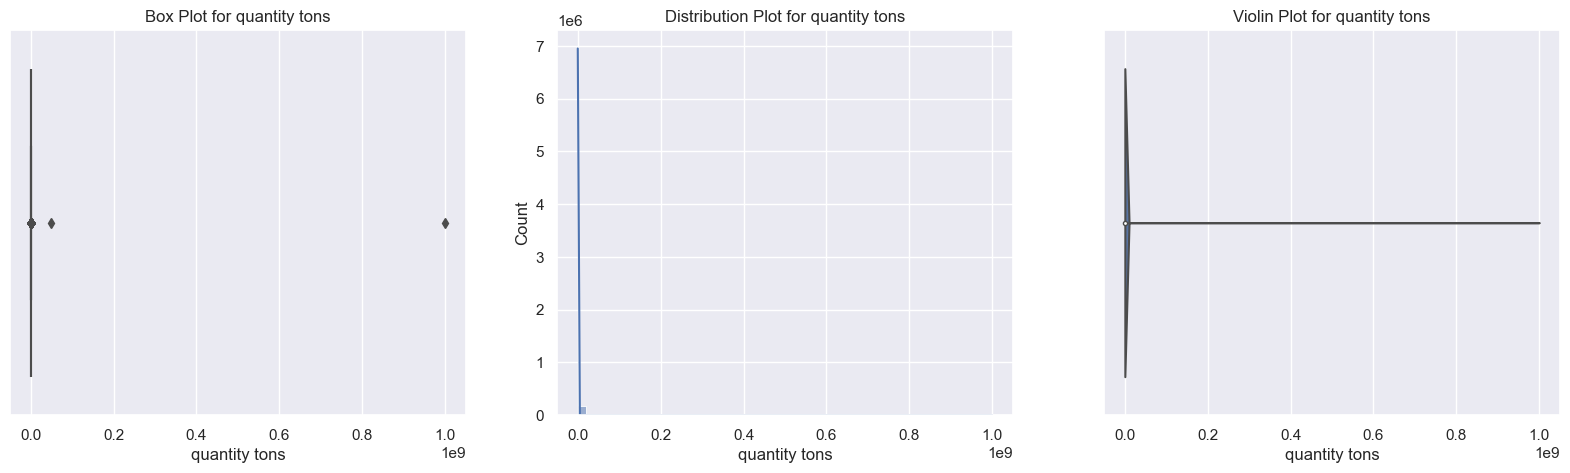

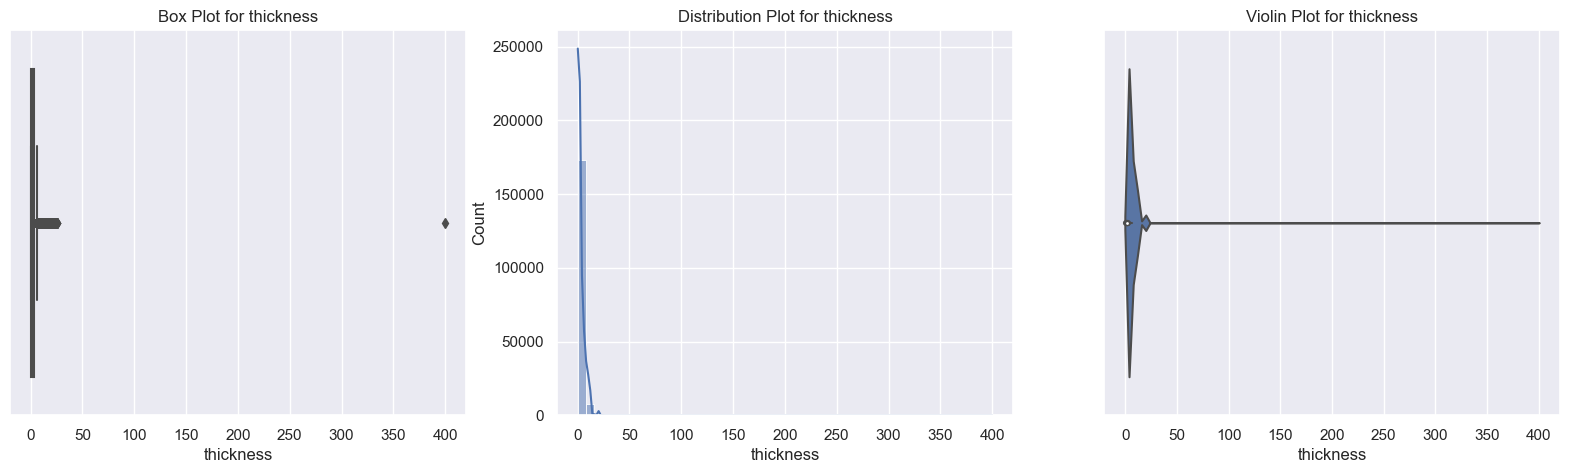

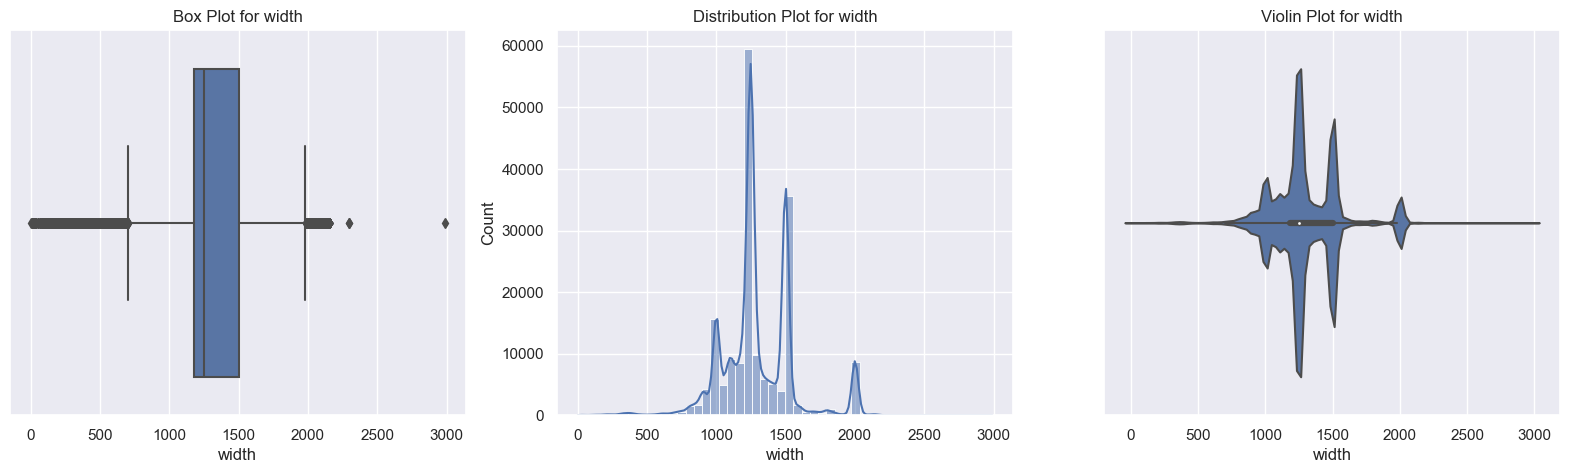

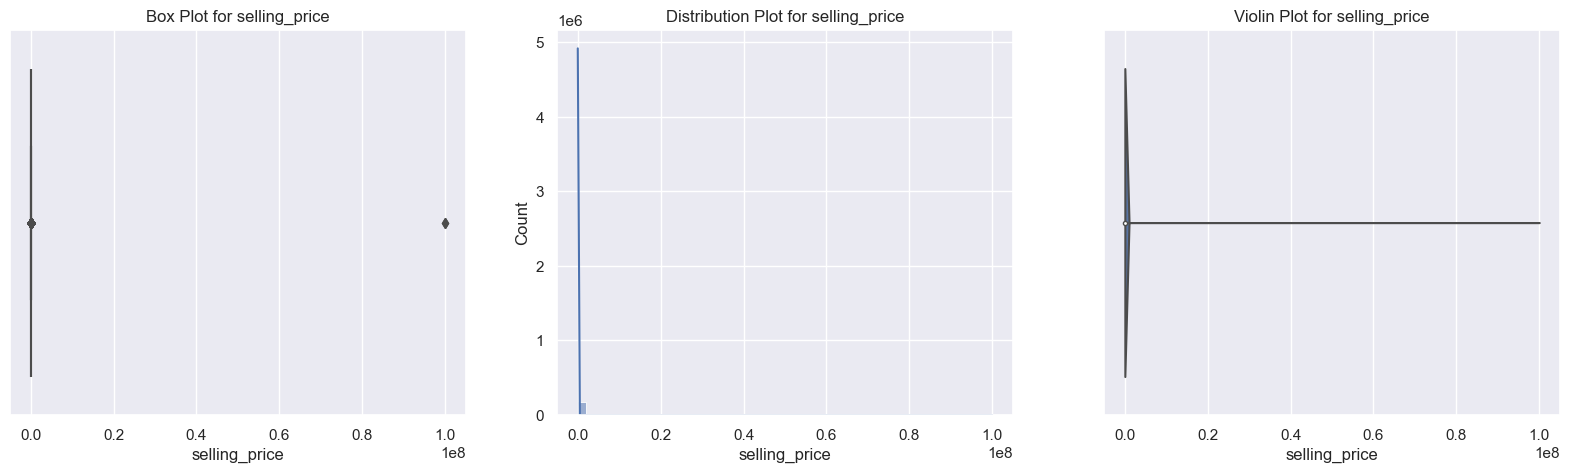

In [18]:
for i in ["quantity tons", "thickness", "width", "selling_price"]:
    plot(df, i)

In [19]:
# We are using Log Transformation method to handel "quantity tons", "thickness", "selling_price" datas.
df1["quantity tons_log"] = np.log(df1["quantity tons"])
df1["thickness_log"] = np.log(df1["thickness"])
df1["selling_price_log"] = np.log(df1["selling_price"])
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00


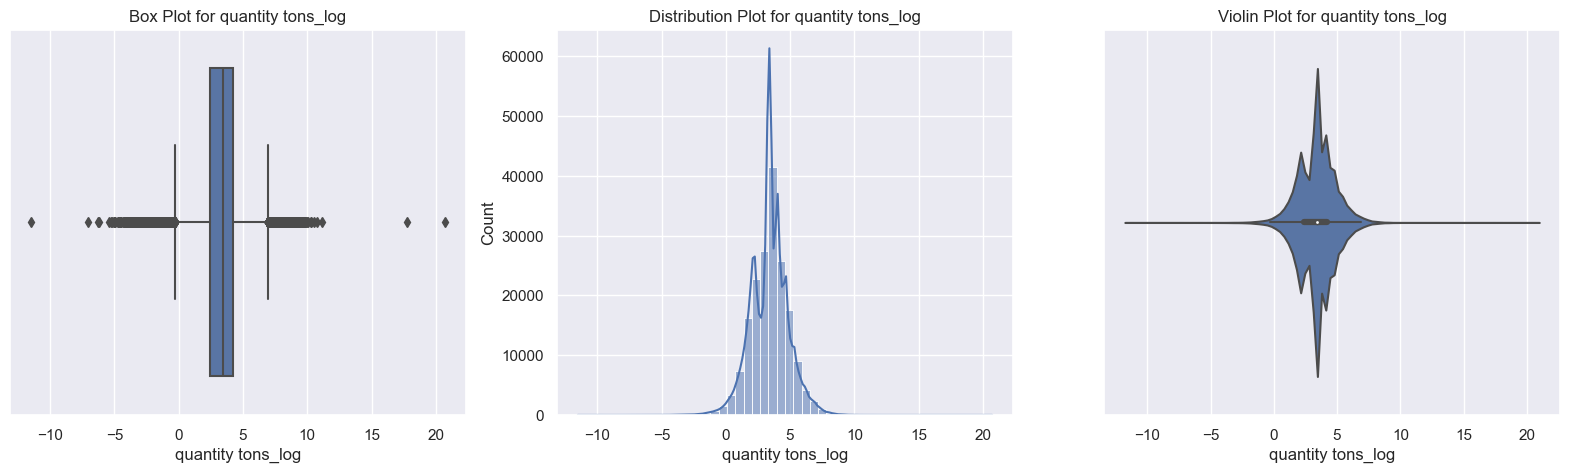

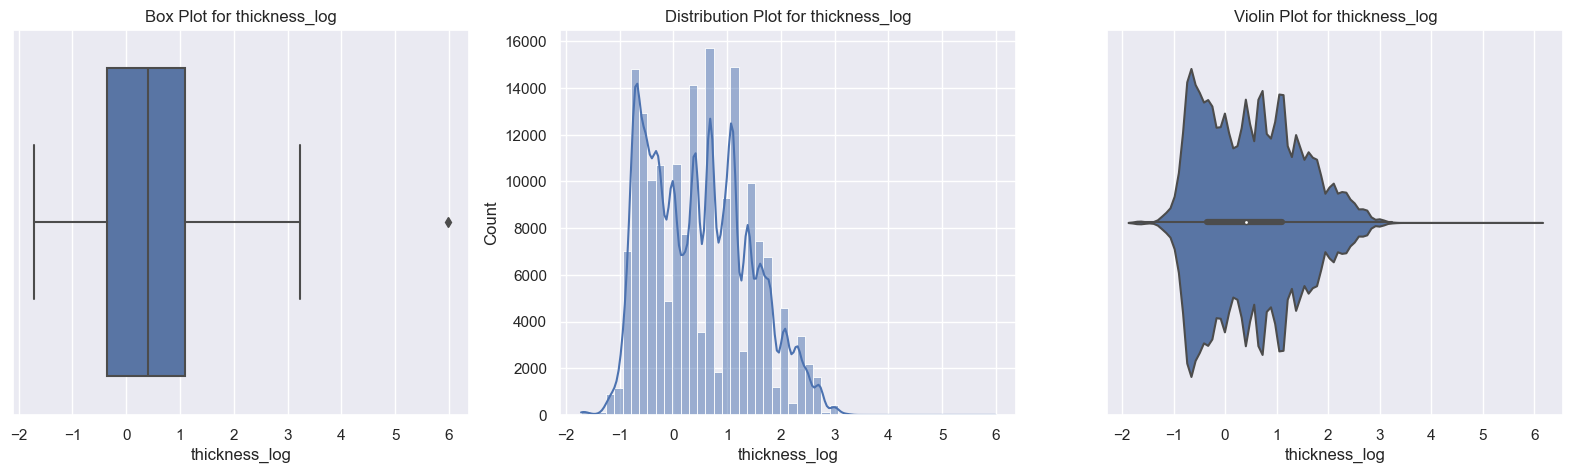

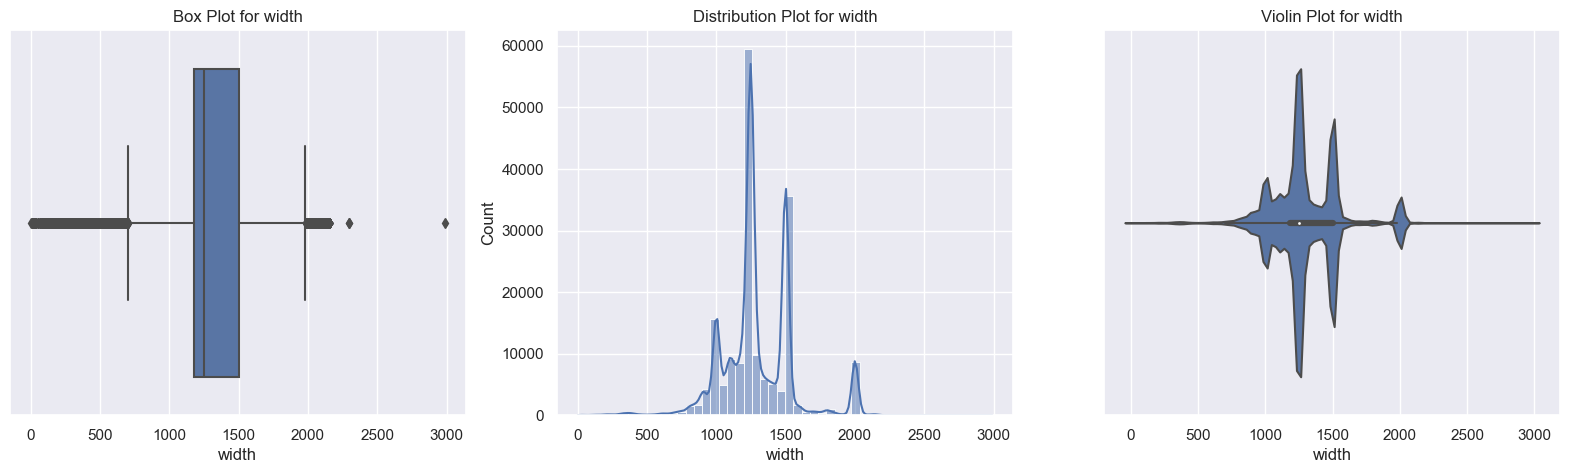

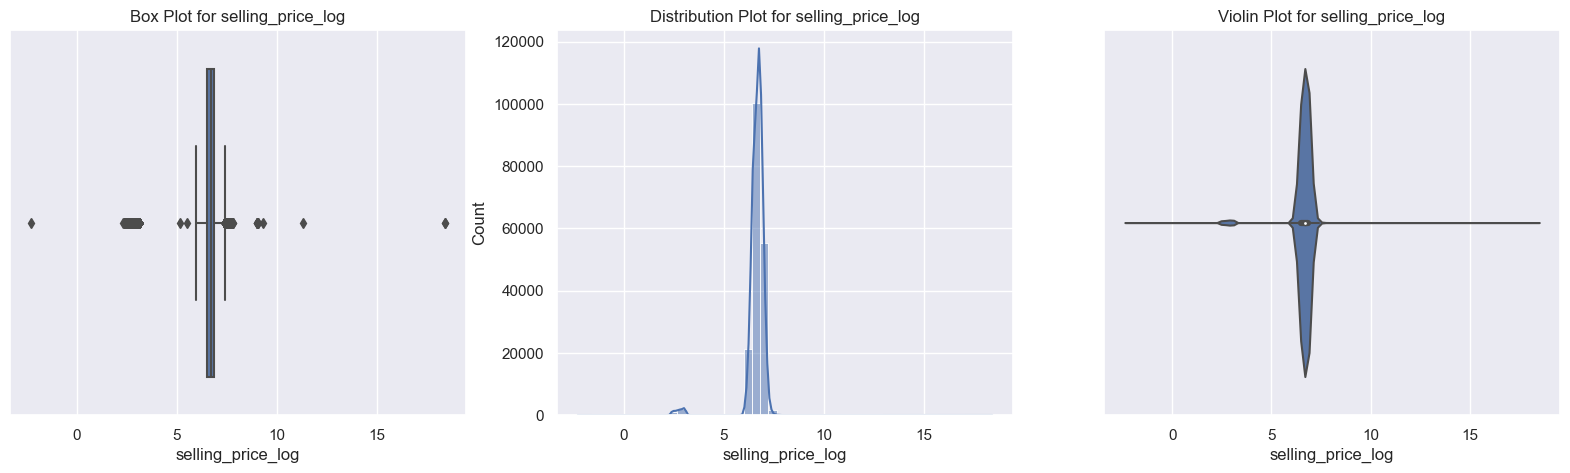

In [20]:
for i in ["quantity tons_log", "thickness_log", "width", "selling_price_log"]:
    plot(df1, i)

In [21]:
# Using the Ordinal Encoder to convert categorical data into numerical data.
OE = OrdinalEncoder()
df1["status_en"] = OE.fit_transform(df1[["status"]])
df1["item type_en"] = OE.fit_transform(df1[["item type"]])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,1970-01-01 00:00:00.164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,1970-01-01 00:00:00.164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,1970-01-01 00:00:00.164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,1970-01-01 00:00:00.164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 181620 non-null  object        
 1   item_date          181620 non-null  object        
 2   quantity tons      181620 non-null  float64       
 3   customer           181620 non-null  float64       
 4   country            181620 non-null  float64       
 5   status             181620 non-null  object        
 6   item type          181620 non-null  object        
 7   application        181620 non-null  float64       
 8   thickness          181620 non-null  float64       
 9   width              181620 non-null  float64       
 10  material_ref       181620 non-null  object        
 11  product_ref        181620 non-null  datetime64[ns]
 12  delivery date      181620 non-null  object        
 13  selling_price      181620 non-null  float64      

In [23]:
item_type_mapping = pd.DataFrame({
    "item type": df1["item type"].unique(),
    "item_type_en": df1["item type_en"].unique()
})
item_type_mapping

,item type,item_type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [24]:
status_mapping = pd.DataFrame({
    "status": df1["status"].unique(),
    "status_en": df1["status_en"].unique()
})
status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


In [25]:
X = df1[["quantity tons_log", "status_en", "item type_en", "application", "thickness_log", "width", "country", "customer", "product_ref"]]
y = df1["selling_price_log"]

In [26]:
X

,quantity tons_log,status_en,item type_en,application,thickness_log,width,country,customer,product_ref
0,3.991779,7.0,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1970-01-01 00:00:01.670798778
1,6.643822,7.0,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1970-01-01 00:00:01.668701718
2,5.956169,7.0,6.0,28.0,-0.967584,952.0,30.0,30153963.0,1970-01-01 00:00:00.000628377
3,5.310301,7.0,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1970-01-01 00:00:01.668701718
4,6.666354,7.0,5.0,10.0,1.386294,2000.0,28.0,30211560.0,1970-01-01 00:00:00.000640665
...,...,...,...,...,...,...,...,...,...
181667,4.670802,7.0,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,1970-01-01 00:00:00.164141591
181668,4.629691,7.0,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,1970-01-01 00:00:00.164141591
181669,5.337954,7.0,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,1970-01-01 00:00:00.164141591
181670,1.443523,7.0,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,1970-01-01 00:00:00.164141591


In [27]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181667    6.400257
181668    6.381816
181669    6.378426
181670    6.428105
181672    6.408529
Name: selling_price_log, Length: 181620, dtype: float64

In [28]:
# Spliting the database  into Training and Testing 
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [29]:
datetime_columns = X_train.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns
print("Datetime columns:", datetime_columns)
for col in datetime_columns:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_train[col + '_day'] = X_train[col].dt.day
    X_train[col + '_hour'] = X_train[col].dt.hour
    X_train = X_train.drop(columns=[col])

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

Datetime columns: Index(['product_ref'], dtype='object')
0.08322006733044574


In [30]:
datetime_columns_test = X_test.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns
print("Datetime columns in X_test:", datetime_columns_test)
for col in datetime_columns_test:
    X_test[col + '_year'] = X_test[col].dt.year
    X_test[col + '_month'] = X_test[col].dt.month
    X_test[col + '_day'] = X_test[col].dt.day
    X_test[col + '_hour'] = X_test[col].dt.hour
    X_test = X_test.drop(columns=[col])

drt = DecisionTreeRegressor()
drt.fit(X_train, y_train)
y_pred = drt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared error:", mse)
print("R-Squared:", r2)

Datetime columns in X_test: Index(['product_ref'], dtype='object')
Mean Squared error: 0.04151141321435532
R-Squared: 0.8719034764345628


In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared error:", mse)
print("R-Squared:", r2)

Mean Squared error: 0.024416136343470174
R-Squared: 0.9246563308180347


In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared error:", mse)
print("R-Squared:", r2)

Mean Squared error: 0.03774449022504217
R-Squared: 0.8835275022651957


In [33]:
etr = ExtraTreeRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared error:", mse)
print("R-Squared:", r2)

Mean Squared error: 0.04442564936783331
R-Squared: 0.8629106840624605


In [35]:
import datetime
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778
product_ref_datetime = datetime.datetime.fromtimestamp(new_product_ref)
product_ref_year = product_ref_datetime.year
product_ref_month = product_ref_datetime.month
product_ref_day = product_ref_datetime.day
product_ref_hour = product_ref_datetime.hour

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                        new_thickness_log, new_width, country, new_customer, 
                       product_ref_year, product_ref_month, product_ref_day, product_ref_hour]])


feature_names = ["quantity tons_log", "status_en", "item type_en", "application",
                 "thickness_log", "width", "country", "customer", "product_ref_year", "product_ref_month", "product_ref_day", "product_ref_hour"]
new_pred = rf.predict(new_sample)
print("Selling Price:",new_pred)

Selling Price: [6.6033298]


In [36]:
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778
product_ref_datetime = datetime.datetime.fromtimestamp(new_product_ref)
product_ref_year = product_ref_datetime.year
product_ref_month = product_ref_datetime.month
product_ref_day = product_ref_datetime.day
product_ref_hour = product_ref_datetime.hour

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                        new_thickness_log, new_width, country, new_customer, 
                        product_ref_year, product_ref_month, product_ref_day, product_ref_hour]])

new_pred = rf.predict(new_sample)[0]
print("Selling Price:", np.exp(new_pred))

Selling Price: 737.546988041081


# Path

In [37]:
with open("model.pkl", "wb") as file:
    pickle.dump(rf, file)

In [38]:
 # Now Classification
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,1970-01-01 00:00:00.164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,1970-01-01 00:00:00.164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,1970-01-01 00:00:00.164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,1970-01-01 00:00:00.164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [39]:
df2 = df1.copy()
df2.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0


In [40]:
df3 = df2[df2["status"].isin(["Won", "Lost"])]
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,1970-01-01 00:00:00.164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,1970-01-01 00:00:00.164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,1970-01-01 00:00:00.164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,1970-01-01 00:00:00.164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [41]:
df3["status"].value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [42]:
df3["status_encoded"] = df3["status"].map({"Won":1, "Lost":0})
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en,status_encoded
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1970-01-01 00:00:01.670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1970-01-01 00:00:01.668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,1970-01-01 00:00:00.000628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1970-01-01 00:00:01.668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,1970-01-01 00:00:00.000640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,1970-01-01 00:00:00.164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0,1
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,1970-01-01 00:00:00.164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,1970-01-01 00:00:00.164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,1970-01-01 00:00:00.164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0,1


In [43]:
df4 = df3[["quantity tons_log", "selling_price_log", "item type_en", "application",
                 "thickness_log", "width", "country", "customer", "product_ref", "status_encoded"]]
df4

,quantity tons_log,selling_price_log,item type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1970-01-01 00:00:01.670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1970-01-01 00:00:01.668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30.0,30153963.0,1970-01-01 00:00:00.000628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1970-01-01 00:00:01.668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28.0,30211560.0,1970-01-01 00:00:00.000640665,1
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,6.400257,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,1970-01-01 00:00:00.164141591,1
181668,4.629691,6.381816,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,1970-01-01 00:00:00.164141591,1
181669,5.337954,6.378426,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,1970-01-01 00:00:00.164141591,1
181670,1.443523,6.428105,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,1970-01-01 00:00:00.164141591,1


In [44]:
df4["status_encoded"].value_counts()

status_encoded
1    115996
0     34431
Name: count, dtype: int64

In [45]:
x = df4.drop(["status_encoded"], axis = 1)
y = df4["status_encoded"]

In [46]:
X, y = X.align(y, join='inner', axis=0)

datetime_columns = X.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns
for col in datetime_columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_hour'] = X[col].dt.hour
    X = X.drop(columns=[col])

if X.isnull().any().any() or y.isnull().any():
    X = X.dropna()
    y = y.loc[X.index]
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [47]:
y_res.value_counts()

status_encoded
1    115996
0    115996
Name: count, dtype: int64

In [48]:
y_res.shape

(231992,)

In [49]:
len(X_res)

231992

In [50]:
X_train,X_test, y_train,y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 12)
(69598, 12)
(162394,)
(69598,)


In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[34200   811]
 [ 1126 33461]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     35011
           1       0.98      0.97      0.97     34587

    accuracy                           0.97     69598
   macro avg       0.97      0.97      0.97     69598
weighted avg       0.97      0.97      0.97     69598



In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[35011     0]
 [    0 34587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35011
           1       1.00      1.00      1.00     34587

    accuracy                           1.00     69598
   macro avg       1.00      1.00      1.00     69598
weighted avg       1.00      1.00      1.00     69598



In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[35011     0]
 [    0 34587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35011
           1       1.00      1.00      1.00     34587

    accuracy                           1.00     69598
   macro avg       1.00      1.00      1.00     69598
weighted avg       1.00      1.00      1.00     69598



In [54]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[35011     0]
 [    0 34587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35011
           1       1.00      1.00      1.00     34587

    accuracy                           1.00     69598
   macro avg       1.00      1.00      1.00     69598
weighted avg       1.00      1.00      1.00     69598



In [55]:
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

product_ref_datetime = datetime.datetime.fromtimestamp(new_product_ref)
product_ref_year = product_ref_datetime.year
product_ref_month = product_ref_datetime.month
product_ref_day = product_ref_datetime.day
product_ref_hour = product_ref_datetime.hour
# numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                        new_thickness_log, new_width, country, new_customer, 
                        product_ref_year, product_ref_month, product_ref_day, product_ref_hour]])

new_pred = rfc.predict(new_sample)
if new_pred ==1:
    print("The Status is: Won")
else:
    print("The Status is: Lost")

The Status is: Lost


In [56]:
# Saving the Model
with open("classifer_model.pkl", "wb") as file:
    pickle.dump(rfc, file)